In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import json
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv('../data/double_hits_edges_no_dupes.csv')

In [3]:
# make graph and do clustering
G = nx.Graph()
# Add edges with weights
for i, row in dat.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

In [4]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

Number of nodes: 152278
Number of edges: 418430


In [5]:
# Filter out non-influential nodes
# You can adjust the threshold based on your needs
degree_centrality = nx.degree_centrality(G)
# betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

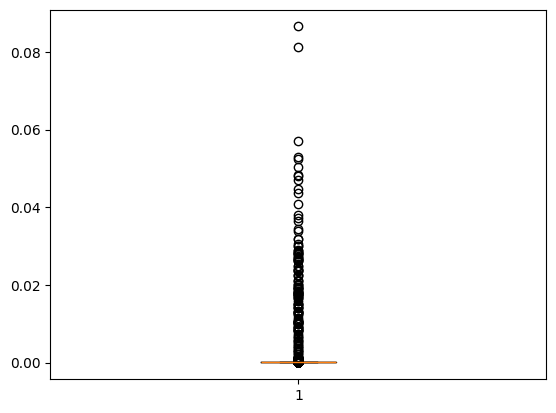

Mean Degree Centrality: 3.6089538927676e-05
Median Degree Centrality: 6.5669799116084505e-06
Standard Deviation of Degree Centrality: 0.0007385303581683098
Max Degree Centrality: 0.08658563013455742
Min Degree Centrality: 6.5669799116084505e-06
Inter-quartile range: 6.5669799116084505e-06
75th percentile: 1.3133959823216901e-05
25th percentile: 6.5669799116084505e-06


In [6]:
# Analyze the distribution of betweenness centrality
centrality_values = list(degree_centrality.values())
# box plot
plt.boxplot(centrality_values)
plt.show()

# Calculate descriptive statistics
mean_centrality = np.mean(centrality_values)
median_centrality = np.median(centrality_values)
std_centrality = np.std(centrality_values)

print(f'Mean Degree Centrality: {mean_centrality}')
print(f'Median Degree Centrality: {median_centrality}')
print(f'Standard Deviation of Degree Centrality: {std_centrality}')
print(f'Max Degree Centrality: {max(centrality_values)}')
print(f'Min Degree Centrality: {min(centrality_values)}')
print(f"Inter-quartile range: {np.percentile(centrality_values, 75) - np.percentile(centrality_values, 25)}")
print(f"75th percentile: {np.percentile(centrality_values, 75)}"
        f"\n25th percentile: {np.percentile(centrality_values, 25)}")

In [7]:
# remove nodes with only one edge
nodes_to_remove = [node for node in G.nodes if G.degree(node) == 1]
G.remove_nodes_from(nodes_to_remove)

# remove isolates
isolates = list(nx.isolates(G))
G.remove_nodes_from(isolates)

In [8]:
# new centrality
centrality_values2 = list(nx.degree_centrality(G).values())
print(f"mean degree centrality: ", np.mean(centrality_values2))
print(f"median degree centrality: ", np.median(centrality_values2))
print(f"std degree centrality: ", np.std(centrality_values2))
print(f"max degree centrality: ", max(centrality_values2))
print(f"min degree centrality: ", min(centrality_values2))
print(f"Inter-quartile range: {np.percentile(centrality_values2, 75) - np.percentile(centrality_values2, 25)}")
print(f"75th percentile: {np.percentile(centrality_values2, 75)}"
        f"\n25th percentile: {np.percentile(centrality_values2, 25)}")

mean degree centrality:  0.00020243055823240968
median degree centrality:  5.313684508838429e-05
std degree centrality:  0.002679619836911776
max degree centrality:  0.22163378086365088
min degree centrality:  1.7712281696128096e-05
Inter-quartile range: 7.084912678451239e-05
75th percentile: 0.00010627369017676858
25th percentile: 3.542456339225619e-05


In [9]:

# threshold = mean_centrality - std_centrality
# threshold degree centrality above the 25th percentile
threshold = np.percentile(centrality_values2, 25)
filtered_nodes_D = [node for node, centrality in degree_centrality.items() if centrality > threshold]
filtered_nodes_D2 = [node for node in filtered_nodes_D if pd.notnull(node)]
# filtered_nodes_B = [node for node, centrality in betweenness_centrality.items() if centrality > threshold]

In [10]:
# Create a subgraph with the filtered nodes
H = G.subgraph(filtered_nodes_D2)
# weight detials
print(H.edges(data=True))

[('hypehouse', 'perc30s', {'weight': 1}), ('hypehouse', 'vape', {'weight': 1}), ('hypehouse', '420vibes', {'weight': 1}), ('hypehouse', 'ouidtiktok', {'weight': 1}), ('hypehouse', 'high', {'weight': 1}), ('hypehouse', 'emma', {'weight': 4}), ('hypehouse', 'odaat', {'weight': 1}), ('spinalfusion', 'pain', {'weight': 57}), ('spinalfusion', 'chronicpain', {'weight': 55}), ('spinalfusion', 'opiates', {'weight': 51}), ('spinalfusion', 'opioids', {'weight': 57}), ('spinalfusion', 'opioidcrisis', {'weight': 52}), ('spinalfusion', 'harmreduction', {'weight': 50}), ('spinalfusion', 'opioidawareness', {'weight': 50}), ('spinalfusion', 'sober', {'weight': 23}), ('spinalfusion', 'addiction', {'weight': 23}), ('spinalfusion', 'sobriety', {'weight': 1}), ('spinalfusion', 'soberlife', {'weight': 6}), ('spinalfusion', 'harmreductionsaveslives', {'weight': 1}), ('spinalfusion', 'recovery', {'weight': 2}), ('woman', 'odaat', {'weight': 1}), ('woman', 'soberliving', {'weight': 1}), ('woman', 'soberhouse'

In [11]:
# print graph details
print(nx.info(H))

Graph with 14569 nodes and 206289 edges


/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_74108/1694325736.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(H))


In [12]:
# do another isolate removal
isolates2 = list(nx.isolates(H))
# H.remove_nodes_from(isolates)


In [13]:
# Perform clustering with Clauset-Newman-Moore algorithm
communities = list(greedy_modularity_communities(H))

# Assign community labels to nodes
community_dict = {}
for i, community in enumerate(communities):
    for node in community:
        community_dict[node] = i

# Add community information to the nodes in the graph
nx.set_node_attributes(H, community_dict, 'community')

# Print out the communities
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {sorted(community)}")


Community 1: ['0d', '0xy', '100623', '100days', '10millionadoptions', '10millionadoptions￼', '10months', '123pandorame', '126', '12and12', '12step', '12stepcomedy', '12stepprogram', '12steprecovery', '12steps', '12stepsinrecovery', '12yearsofrecovery', '1312', '13reasonswhy', '13thstep', '17', '1year', '1yearclean', '1yearsober', '2022tiktok', '21andsober', '24hours', '24🙏🏼🤞🏼', '24🤞🏼', '25', '26', '28daysofeucerin', '2pac', '2yearssober', '304', '30days', '30dayssober', '315', '32', '33333', '365', '365days', '365dayslater', '36secondsoflightwork', '3days', '3years', '3yearscleanandsober', '40', '4bharmreductionsociety', '4uu', '4years', '4yearssober', '4yourpage', '501c3', '502', '5daysclean', '5monthssober', '6montha', '6monthssober', '6years', '716', '716buffalo', '7months', '7years', '8ball', '8pm', '8yearssober', '90and90', '90meetings90days', '911', '990', '9months', '9years', '9yearssober', '???', '@Brandi Mac', '@Juno / Bee ', '@SimplyMedicine', '@octopusdarling ', 'ChristmasTr

In [28]:
# export for gephi
nx.write_gexf(H, 'double_hits_filtered_upper75.gexf')

In [14]:
# export to csv
# nodes
nodes = pd.DataFrame(H.nodes(data=True), columns=['node', 'data'])
nodes['community'] = nodes['data'].apply(lambda x: x['community'])
nodes.drop(columns=['data'], inplace=True)
nodes.to_csv('../data/double_hits_filtered_upper75_nodes.csv', index=False)

In [19]:
# read seed hashtags and clusters
# seed_hashtags = pd.read_csv("community-grouping_20240730(in).csv")

In [22]:
def label_hashtags_by_clusters(G, seed_hashtags):
    # Create a dictionary to store the cluster for each hashtag
    hashtag_clusters = {}

    # Iterate through each theme and its associated hashtags
    for theme in seed_hashtags.columns[1:]:
        seed_nodes = seed_hashtags['Node'][seed_hashtags[theme] == 'y'].tolist()
        for seed in seed_nodes:
            # Get the ego network up to 2 hops
            ego_network = nx.ego_graph(G, seed, radius=1, undirected=True)
            for node in ego_network.nodes:
                if node not in hashtag_clusters:
                    hashtag_clusters[node] = set()
                hashtag_clusters[node].add(theme)
    
    # Convert the dictionary to a DataFrame
    labeled_hashtags = pd.DataFrame(list(hashtag_clusters.items()), columns=['Hashtag', 'Themes'])
    labeled_hashtags['Themes'] = labeled_hashtags['Themes'].apply(lambda x: list(x))
    
    return labeled_hashtags

In [23]:
labeled_hashtags = label_hashtags_by_clusters(H, seed_hashtags)

# OLD
---
TRIPLE HITS

In [18]:
# redo with triple hits
dat = pd.read_csv('triple_hits_edges_no_dupes.csv')

In [19]:
G2 = nx.Graph()
# Add edges with weights
for i, row in dat.iterrows():
    G2.add_edge(row['source'], row['target'], weight=row['weight'])

degree_centrality2 = nx.degree_centrality(G2)

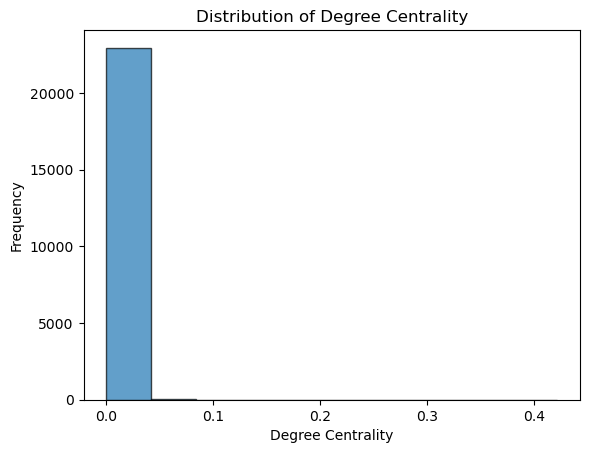

In [20]:
# plot degree centrality
centrality_values2 = list(degree_centrality2.values())
plt.hist(centrality_values2, edgecolor='k', alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Centrality')
plt.show()


In [21]:
# descriptive statistics
mean_centrality2 = np.mean(centrality_values2)
median_centrality2 = np.median(centrality_values2)
std_centrality2 = np.std(centrality_values2)

print(f'Mean Degree Centrality: {mean_centrality2}')
print(f'Median Degree Centrality: {median_centrality2}')
print(f'Standard Deviation of Degree Centrality: {std_centrality2}')

# Set a threshold based on the distribution
# For example, use the mean or a multiple of the standard deviation
threshold2 = mean_centrality2 + std_centrality2  # Example threshold

Mean Degree Centrality: 0.0005783704455376405
Median Degree Centrality: 0.0001738299074355743
Standard Deviation of Degree Centrality: 0.0064888479505552325


In [22]:
filtered_nodes_D2 = [node for node, centrality in degree_centrality2.items() if centrality > threshold2]

H2 = G2.subgraph(filtered_nodes_D2)


In [23]:
# Perform clustering with Clauset-Newman-Moore algorithm
communities2 = list(greedy_modularity_communities(H2))

# Assign community labels to nodes
community_dict2 = {}
for i, community in enumerate(communities2):
    for node in community:
        community_dict2[node] = i

# Add community information to the nodes in the graph
nx.set_node_attributes(H2, community_dict2, 'community')

# Print out the communities
for i, community in enumerate(communities2):
    print(f"Community {i + 1}: {sorted(community)}")

Community 1: ['addictionhumor', 'addictionskit', 'bars', 'blackedout', 'blackout', 'coughsyrup', 'dr00g', 'dr00gtiktok', 'drank', 'drunk', 'drvgaddiction', 'drvgzx', 'hammered', 'hangover', 'harmreduction', 'hungover', 'lean', 'leantok', 'm0lly', 'molly', 'opiates', 'percs', 'pinger', 'pingertok', 'pingerzzzz', 'pingtok', 'recovery', 'relapsehappens', 'shitfaced', 'sober', 'soberlife', 'sobriety', 'syrup', 'tipsy', 'wasted', 'wedorecover', 'xan', 'xans', 'xantok']
Community 2: ['chronicpain', 'cleanandsober', 'detox', 'drugpolicy', 'drugrehab', 'endoverdose', 'fent', 'harmreductionsaveslives', 'harmreductiontips', 'harmreductionworks', 'heroin', 'methadoneclinic', 'na', 'naloxone', 'naloxonesaveslives', 'naltrexone', 'narcan', 'narcansaveslives', 'odaat', 'onedayatatime', 'opioidaddiction', 'opioidawareness', 'opioidcrisis', 'opioids', 'overdose', 'overdoseawareness', 'overdosecrisis', 'overdoseresponse', 'pain', 'pwud', 'safesupply', 'saynotodrugs', 'soberhouse', 'soberliving', 'sobri

In [24]:
nx.write_gexf(H2, 'triple_hits_filtered.gexf')

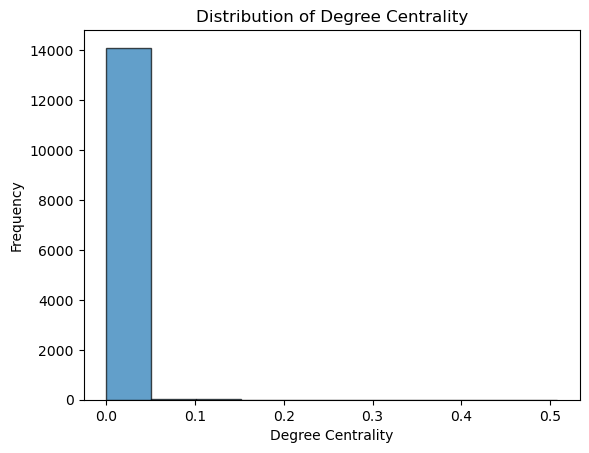

Mean Degree Centrality: 0.0011391684336007726
Median Degree Centrality: 0.0003532819896841659
Standard Deviation of Degree Centrality: 0.010455500072650259


In [25]:
# repeat for quadruple hits
dat = pd.read_csv('quadruple_hits_edges_no_dupes.csv')

G3 = nx.Graph()
# Add edges with weights
for i, row in dat.iterrows():
    G3.add_edge(row['source'], row['target'], weight=row['weight'])

degree_centrality3 = nx.degree_centrality(G3)

# plot degree centrality
centrality_values3 = list(degree_centrality3.values())
plt.hist(centrality_values3, edgecolor='k', alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Centrality')
plt.show()


# descriptive statistics
mean_centrality3 = np.mean(centrality_values3)
median_centrality3 = np.median(centrality_values3)
std_centrality3 = np.std(centrality_values3)

print(f'Mean Degree Centrality: {mean_centrality3}')
print(f'Median Degree Centrality: {median_centrality3}')
print(f'Standard Deviation of Degree Centrality: {std_centrality3}')

# Set a threshold based on the distribution
threshold3 = mean_centrality3 + std_centrality3  


In [26]:
# filter
filtered_nodes_D3 = [node for node, centrality in degree_centrality3.items() if centrality > threshold3]

H3 = G3.subgraph(filtered_nodes_D3)


# Perform clustering with Clauset-Newman-Moore algorithm
communities3 = list(greedy_modularity_communities(H3))

# Assign community labels to nodes
community_dict3 = {}
for i, community in enumerate(communities3):
    for node in community:
        community_dict3[node] = i

# Add community information to the nodes in the graph
nx.set_node_attributes(H3, community_dict3, 'community')

# Print out the communities
for i, community in enumerate(communities3):
    print(f"Community {i + 1}: {sorted(community)}")

nx.write_gexf(H3, 'quadruple_hits_filtered.gexf')

Community 1: ['acid', 'addiction', 'addictionhumor', 'addictionskit', 'bars', 'blackedout', 'blackout', 'cigs', 'coughsyrup', 'dr00g', 'dr00gtiktok', 'drank', 'drunk', 'drvgaddiction', 'hammered', 'harmreductionsaveslives', 'high', 'hungover', 'lean', 'molly', 'na', 'percs', 'pinger', 'pingertok', 'pingerzzzz', 'pingtok', 'psychedelictok', 'recovery', 'shitfaced', 'sober', 'soberlife', 'sobriety', 'sobrietybirthday', 'stonertokfyp', 'tipsy', 'wasted', 'wedorecover', 'xan']
Community 2: ['chronicpain', 'cleanandsober', 'drugpolicy', 'drugrehab', 'endoverdose', 'fent', 'harmreductiontips', 'harmreductionworks', 'heroin', 'methadoneclinic', 'naloxone', 'naloxonesaveslives', 'naltrexone', 'narcan', 'narcansaveslives', 'odaat', 'onedayatatime', 'opiates', 'opioidaddiction', 'opioidawareness', 'opioidcrisis', 'opioids', 'overdose', 'overdoseawareness', 'overdosecrisis', 'pwud', 'relapsehappens', 'safesupply', 'soberhouse', 'soberliving', 'substanceabuse', 'substanceusedisorder']
Community 3: